In [69]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display

## Introdução

Na atualidade, é notório que o mercado imobiliário é capaz de influenciar toda uma cadeia econômica e social. Nesse sentido, segundo matéria da revista EXAME [1], em 2020 o Google registrou um aumento de 668% na busca por casas para alugar. A partir disso, o grupo decidiu criar modelos preditivos que, com base nos aspectos físicos e geográficos de um imóvel, consiga prever seu valor imobiliário para aluguel na cidade de São Paulo. 

## Minerando dados

 Os dados utilizados para este projeto foram obtidos na plataforma Kaggle [2], sendo referentes à abril de 2019.

`Importando base de dados`

In [70]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')
df_bin = pd.read_csv('sao-paulo-properties-april-2019.csv')

`Confere se há valor nulo (nan) no dataframe`

In [71]:
display(df.isnull().sum())

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

Não há valores nulos. Caso houvesse, essa célula seria eliminada, pois em nada contribuiria para a análise.

`Verifica o tipo de cada coluna do dataframe`

In [72]:
display(df.dtypes)

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

`Verifica serie binária`

Series binárias devem ser transformadas em valores de 'sim' ou 'não' e pertencer ao tipo 'Category'. 

In [73]:
display(df['Rooms'].unique())
display(df['Toilets'].unique())
display(df['Suites'].unique())
display(df['Parking'].unique())
display(df['Elevator'].unique())
display(df['Furnished'].unique())
display(df['Swimming Pool'].unique())
display(df['New'].unique())
display(df['Negotiation Type'].unique())
display(df['Property Type'].unique())


array([ 2,  1,  3,  4,  5, 10,  6,  7], dtype=int64)

array([2, 3, 4, 1, 5, 6, 7, 8], dtype=int64)

array([1, 3, 2, 4, 0, 5, 6], dtype=int64)

array([1, 2, 3, 4, 5, 6, 8, 9, 0, 7], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array(['rent', 'sale'], dtype=object)

array(['apartment'], dtype=object)

A partir disso,  é  possível perceber que as séries ['Elevator, Furnished, Swimming Pool, New'] podem ser transformadas
em categorias. 

Além disso, o grupo concluiu que as séries ['Latitude, Longitude'] podem ser desconsideradas na análise de preços, pois a série ['District'] já permite analisar a influência da região no valor mobiliário. 

Ademais, a série ['Property Type'] possui todos os valores iguais e, por isso, em nada contribui para a análise.

`Limpando a base de dados`

Retiramos as séries ['Longitude', 'Latitude'] e consideramos apenas dados refentes a aluguéis. 

In [74]:
rent = df['Negotiation Type'] == 'rent'
df = df.loc[rent,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District']]
df_bin = df_bin.loc[rent,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District']]

Limpamos a série ['District'], retirando a informação geral de que os bairros são da cidade de São Paulo.

In [75]:
df[['District','City']] = df['District'].str.split('/', expand = True)
df = df.drop(columns='City', axis=1)
df_bin[['District','City']] = df_bin['District'].str.split('/', expand = True)
df_bin = df_bin.drop(columns='City', axis=1)

Preservamos os valores binários em uma base de dados chamada df_bin e transformamos cada valor diferente de destrito em uma nova coluna com o valores 1 se o ap for do distrito e 0 se não.

Transformamos as séries binárias e a séries não numéricas em categorias e substituímos os valores 0 e 1 por 'não' e 'sim' respectivamente.

In [76]:
#Tranformando em categoria
df['District'] = df['District'].astype('category')
df['Swimming Pool'] = df['Swimming Pool'].astype('category')
df['New'] = df['New'].astype('category')
df['Furnished'] = df['Furnished'].astype('category')
df['Elevator'] = df['Elevator'].astype('category')

In [77]:
#Substituindo valores binários
df['Swimming Pool'].cat.categories = ['No', 'Yes']
df['Furnished'].cat.categories = ['No', 'Yes']
df['Elevator'].cat.categories = ['No', 'Yes']
df['New'].cat.categories = ['No', 'Yes']

`Base de dados final`

Por fim, chegamos a um conjunto final de dados com 7228 registros e 12 atributos, um dos quais era o nosso alvo de predição. Abaixo, a legenda acerca de cada série:

**Price**: Preço final anunciado (em reais)

**Condo**: Despesas de condomínio (valores desconhecidos são marcados como zero)

**Size**: O tamanho da propriedade em m² (somente áreas privadas)

**Rooms**: Número de quartos

**Toilets**: Número de banheiros

**Suites**: Número de quartos com banheiro privativo 

**Parking**: Número de vagas de garagem 

**Elevator**: Prédio possui ou não elevador

**Furnished**: Apartamento é mobiliado ou não

**Swimming Pool**: Propriedade possui ou não piscina

**New**: Propriedade é recente ou não

**District**: Bairro em que o imóvel está localizado

In [78]:
display(df.head())
display(df.shape)
display(df.dtypes)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District
0,930,220,47,2,2,1,1,No,No,No,No,Artur Alvim
1,1000,148,45,2,2,1,1,No,No,No,No,Artur Alvim
2,1000,100,48,2,2,1,1,No,No,No,No,Artur Alvim
3,1000,200,48,2,2,1,1,No,No,No,No,Artur Alvim
4,1300,410,55,2,2,1,1,Yes,No,No,No,Artur Alvim


(7228, 12)

Price               int64
Condo               int64
Size                int64
Rooms               int64
Toilets             int64
Suites              int64
Parking             int64
Elevator         category
Furnished        category
Swimming Pool    category
New              category
District         category
dtype: object

## Análise exploratória

#### Gráfico 1: Disposição  dos preços

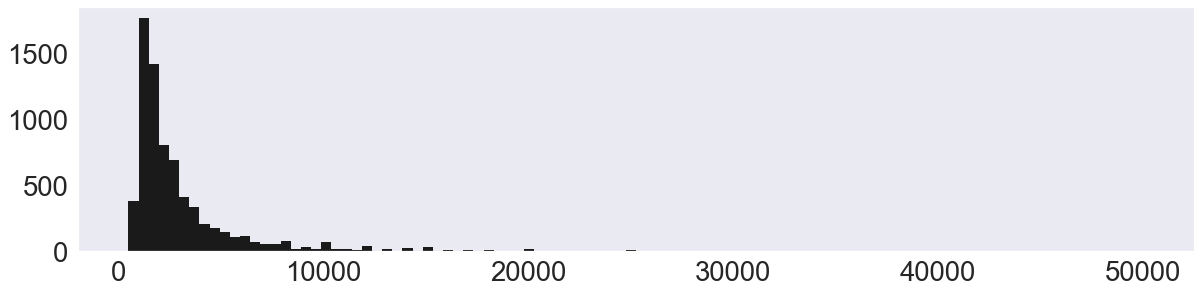

In [79]:
f = plt.figure(figsize=(20, 4.5))
plt.hist(df.Price, bins=100, color='k', linewidth=0.0, edgecolor='white')
plt.grid()
plt.show()

In [80]:
pop_price = df.Price<=15000
pop_price = df_bin.Price<=15000
df = df.loc[pop_price, :]
df_bin = df_bin.loc[pop_price, :]

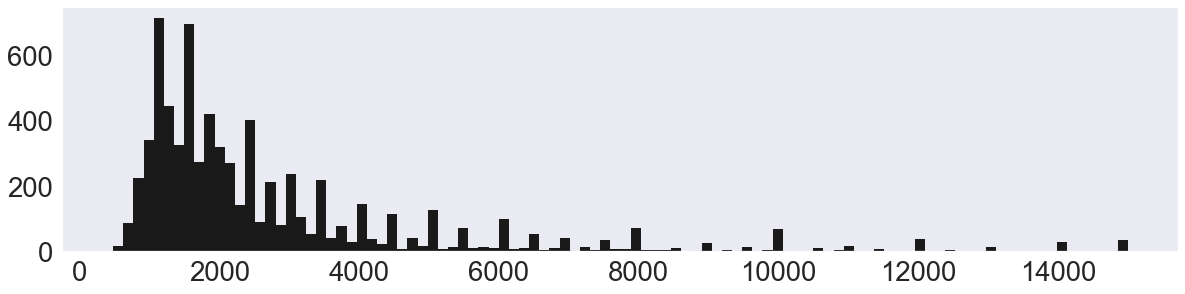

In [81]:
f = plt.figure(figsize=(20, 4.5))
plt.hist(df.Price, bins=100, color='k', linewidth=0.0, edgecolor='white')
plt.grid()
plt.show()

O gráfico demonstra a disposição da nossa variável de interesse ('Prices') em quantidades. Ele nos permite concluir que a maioria dos apartamentos possui valor de aluguel abaixo de 5 mil reais e poucos apartamentos possui valor de aluguel acima dos 10 mil reais.

#### Gráfico 2: Relação bairro e preços

In [82]:
grouped = df.groupby('District')['Price'].mean().reset_index()
grouped = grouped.sort_values(by = 'Price',ascending = False)

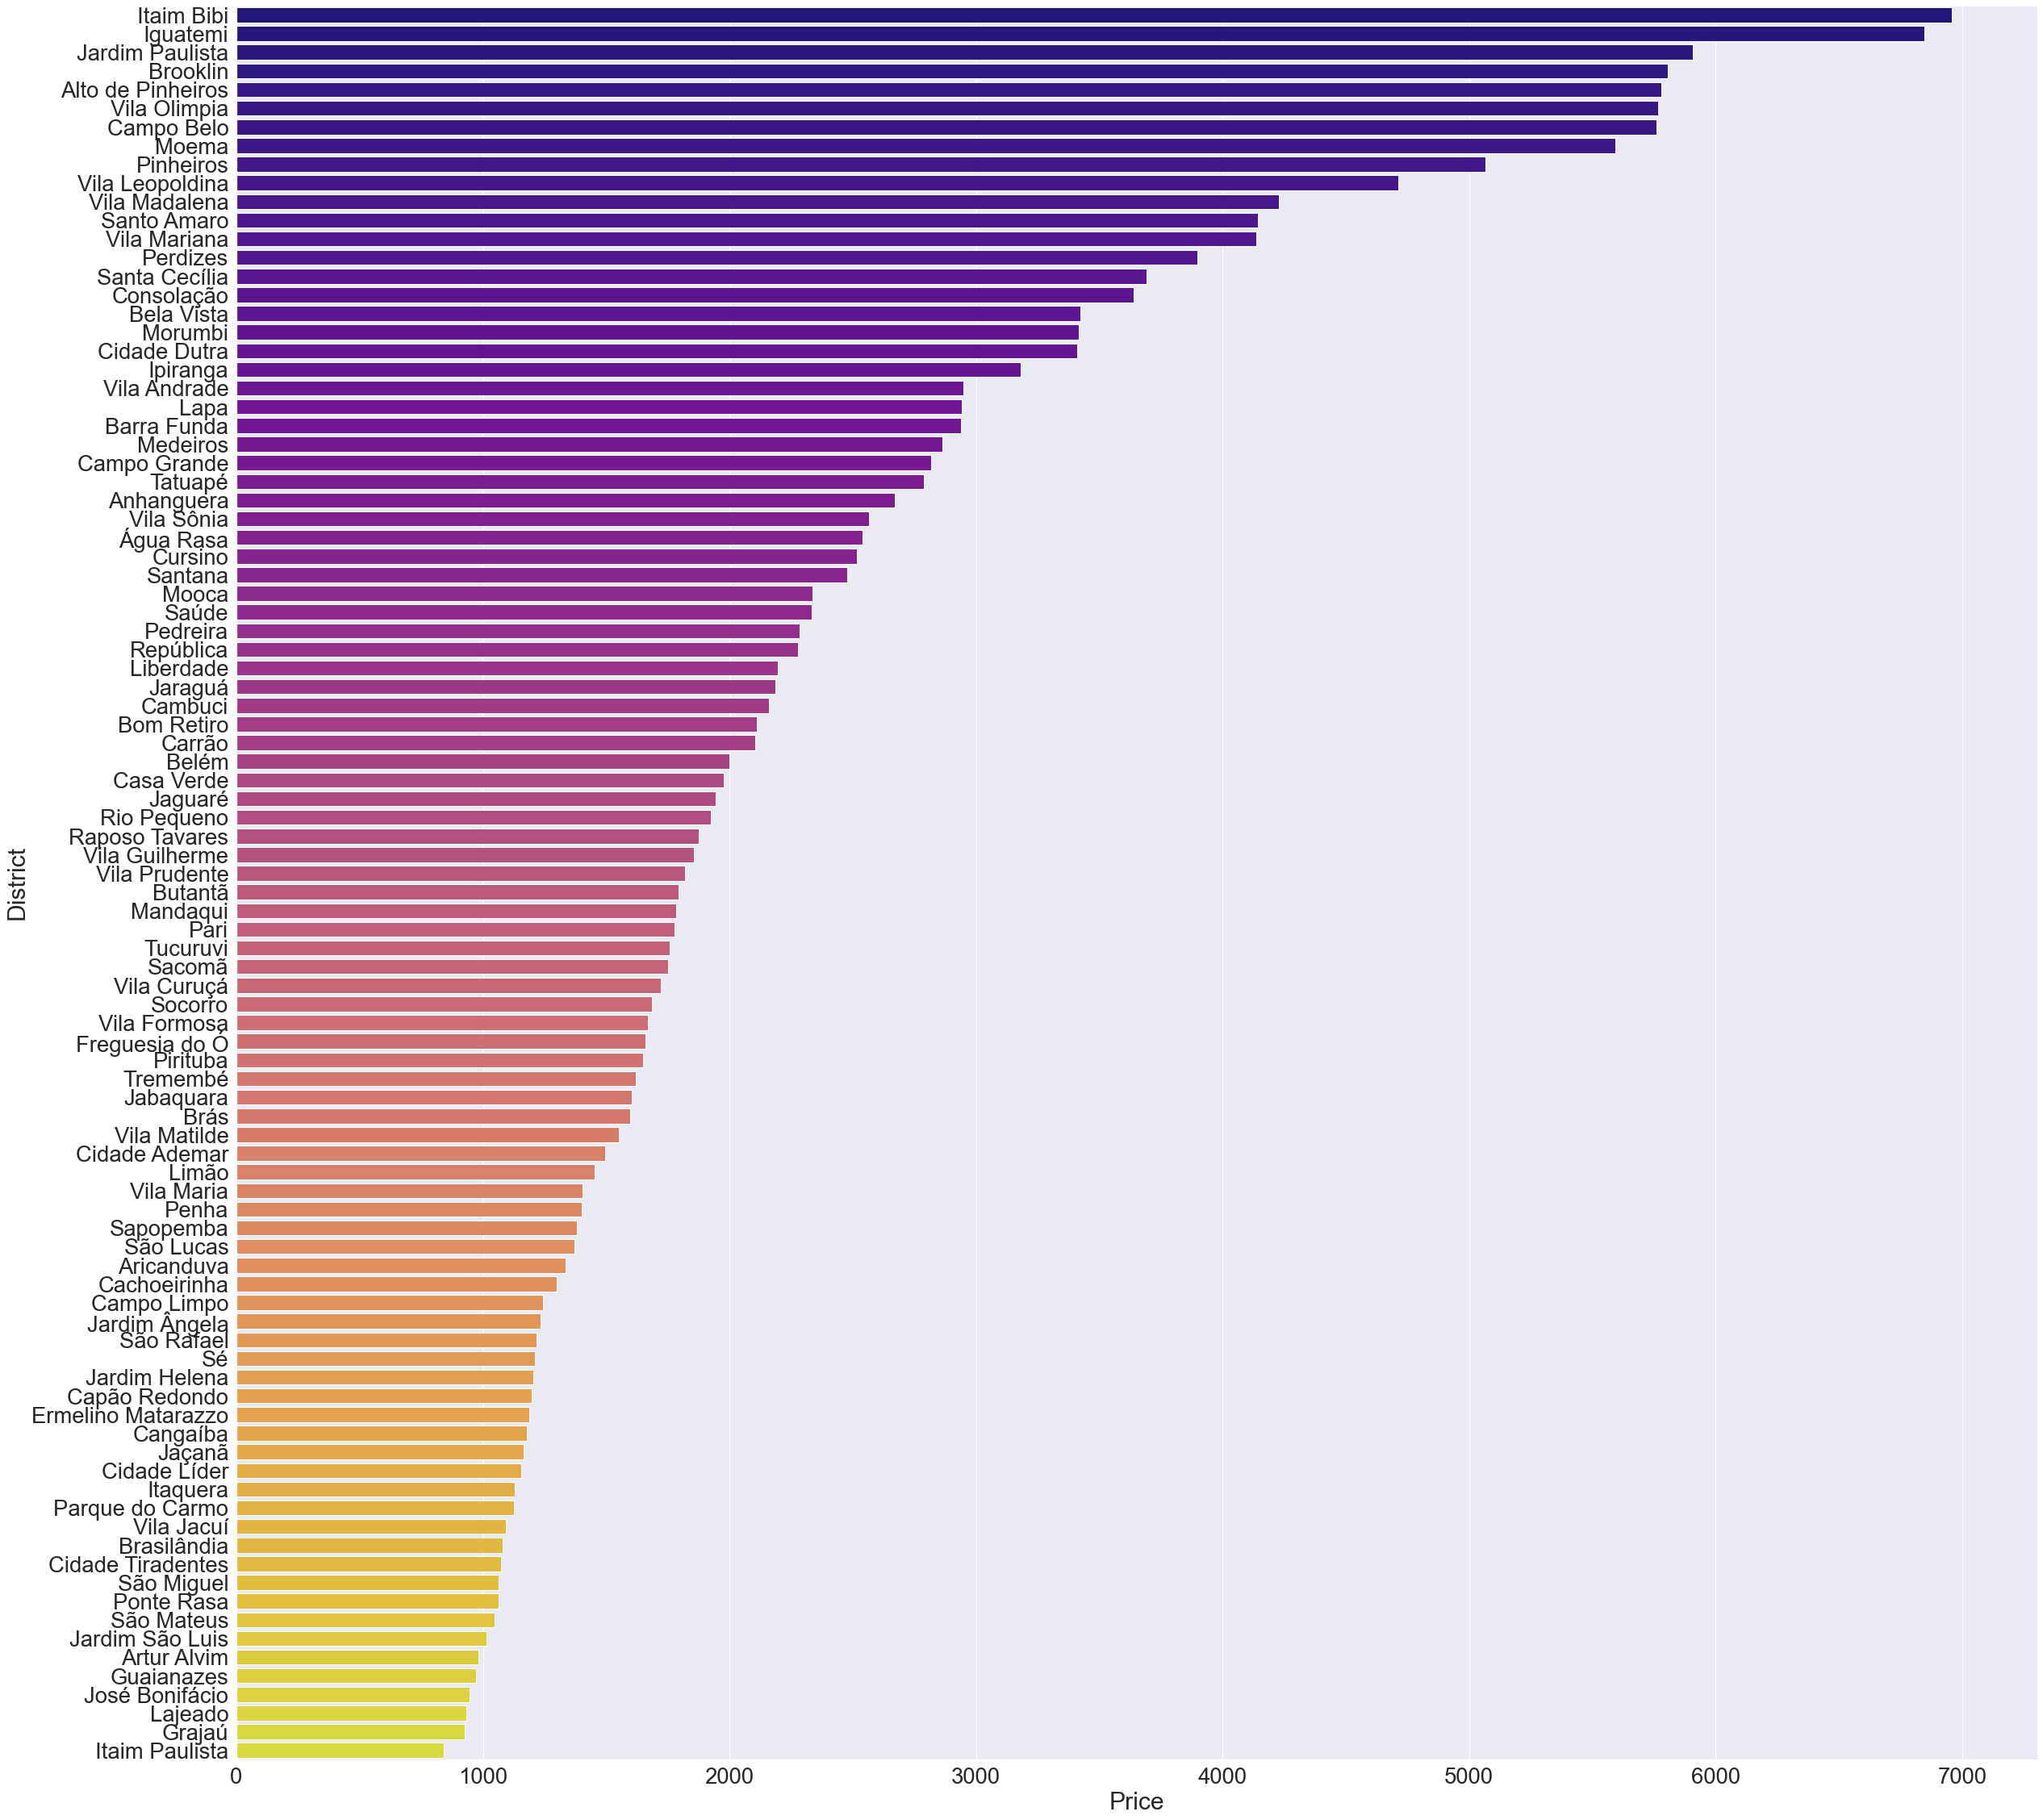

In [83]:
plt.figure(figsize = (40,40))
sns.set(font_scale = 2.5)
ax = sns.barplot(x='Price', y='District', data= grouped,order = grouped['District'], palette = 'plasma')

O gráfico demonstra, de cima para baixo, os bairros com maior e menor preço médio de aluguel na cidade de São Paulo. Ele nos permite concluir que os bairros Itaim Bibi, Iguatemi, Jardim Paulista, Brooklin, Alto de Pinheiros e Vila Olímpia possuem os maiores preços médios. Já os bairros Itaim Paulista, Grajaú, Lajeado, José Bonifácio e Guaianazes possuem os menores preços médios. 

## Base de Testes e Base de Treinamento

Para criar nosso modelo preditivos é necessário a utilização de uma base de treinamento e uma base de testes. Para isso, utilizamos a função *train_test_split* da biblioteca *sklearn*

In [84]:
features = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites',	'Parking',	'Elevator',	'Furnished', 'Swimming Pool', 'New', 'District']
X = df_bin.loc[:, features]
y = df_bin.loc[:, ['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .60)

X_train.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District
1698,600,52,2,2,1,1,1,1,0,0,Butantã
10604,2500,62,1,2,1,2,0,1,1,0,Itaim Bibi
2337,465,65,2,2,1,1,1,0,1,0,Brás
4449,800,65,2,2,1,1,0,1,1,0,Jaguaré
2867,240,43,1,1,0,0,0,0,0,0,Vila Maria


No  entanto, para alguns modelos, era necessário que a coluna 'District' fosse transformada em valores binários. Para isso, utilizamos a função *OneHotEncoder* da biblioteca *sklearn.compose*. Ela cria novas colunas binárias, as quais cada uma delas representa um bairro que faz parte do nosso DataFrame. 

`Transformando base de treinamento`

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['District']),
    remainder='passthrough')
transformed = transformer.fit_transform(X_train)
transformed_X_train = pd.DataFrame(transformed.toarray(), columns=transformer.get_feature_names())
transformed_X_train.columns = [col.replace('onehotencoder__', '') for col in transformed_X_train.columns]
transformed_X_train.columns = [col.replace('remainder__', '') for col in transformed_X_train.columns]


`Transformando base de teste`

In [86]:
transformed = transformer.transform(X_test)
transformed_X_test = pd.DataFrame(transformed.toarray(), columns=transformer.get_feature_names())
transformed_X_test.columns = [col.replace('onehotencoder__', '') for col in transformed_X_test.columns]
transformed_X_test.columns = [col.replace('remainder__', '') for col in transformed_X_test.columns]


## Modelos de predição

Os modelos de predição escolhidos para este trabalho foram as seguintes 3 técnicas já conhecidas da literatura:

1. K-Vizinhos Mais Próximos
2. Regressão Linear
3. Árvore de Decisão

### K-Vizinhos Mais Próximos

O algoritmo K- Vizinhos Mais Próximos (K-Nearest Neighbors) define uma predição a partir da distância da variável de interesse a amostras vizinhas advindas de um conjunto de treinamento. [4]

`Importando bibliotecas`

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

Algumas funções da biblioteca Sklearn foram importadas, a fim de facilitar a predição. 

StandardScaler: Padroniza as features removendo a média e dimensionando para a unidade da variável de interesse.

KNeighborsRegressor: Biblioteca que fará a regressão.

`Converte o DataFrame para NumPy array`

In [88]:
df_bin_knn = df_bin.to_numpy()


`Define o número de linhas e o número de colunas`

In [89]:
nrow,ncol = df_bin_knn.shape

`Define o x e o y que serão usados na predição`

In [90]:
y = df_bin_knn[:,-1]
X = df_bin_knn[:,0:ncol-1]

O valor y é o que queremos prever, nesse caso, os preços dos imóveis. 

O valor x são as nossas variáveis, que definirão a predição. 

`Padroniza a variável x`

In [91]:
scaler = StandardScaler().fit(X)

X = scaler.transform(X)

`Define o número de vizinhos que serão analisados`

In [92]:
k = 5

`Faz a predição`

In [93]:
model = KNeighborsRegressor(n_neighbors=k,metric='euclidean')
model.fit(transformed_X_train, y_train)
y_pred_knn = model.predict(transformed_X_test)

A função recebe as variáveis n_neighbors, que definimos como 5, e a métrica que usaremos para calcular a distância entre os pontos.

Nós escolhemos a métrica euclidiana, que é baseada na distância entre 2 vetores representados no plano bi-dimensional. Demonstração a seguir:

<img src = 'img\Captura de tela 2022-06-02 150350.png'>

`Resultado:`

In [94]:
y_pred_knn

array([[6500.],
       [2760.],
       [3698.],
       ...,
       [1200.],
       [2464.],
       [2000.]])

### Regressão Linear

In [95]:
import statsmodels.api as sm

In [96]:
X = X_train.drop('District', axis=1)
Y = y_train[['Price']]

In [97]:
def regress(Y,X):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [98]:
results = regress(Y,X)
display(results.pvalues)


const             3.126813e-02
Condo             8.772470e-29
Size             6.157846e-109
Rooms             1.162734e-27
Toilets           3.757756e-05
Suites            7.396163e-02
Parking           6.498227e-13
Elevator          1.524078e-01
Furnished         1.608239e-42
Swimming Pool     3.712591e-11
New               7.593713e-01
dtype: float64

In [99]:
X = X.drop('New', axis=1)
results = regress(Y,X)
results.pvalues

const             3.154156e-02
Condo             8.368799e-29
Size             5.358162e-109
Rooms             1.189622e-27
Toilets           3.733175e-05
Suites            7.418702e-02
Parking           6.700742e-13
Elevator          1.493788e-01
Furnished         1.638204e-42
Swimming Pool     3.612500e-11
dtype: float64

In [100]:
X = X.drop('Toilets', axis=1)
results = regress(Y,X)
results.pvalues

const             2.495653e-08
Condo             1.621378e-29
Size             9.890201e-112
Rooms             6.271471e-26
Suites            8.529543e-19
Parking           1.824870e-13
Elevator          3.654828e-01
Furnished         3.862549e-43
Swimming Pool     3.094633e-11
dtype: float64

In [101]:
X = X.drop('Elevator', axis=1)
results = regress(Y,X)
results.pvalues

const             3.762317e-08
Condo             1.419183e-29
Size             6.340434e-112
Rooms             7.226758e-26
Suites            1.262805e-18
Parking           1.127304e-13
Furnished         5.638717e-43
Swimming Pool     4.674894e-11
dtype: float64

In [102]:
X = X.drop('Swimming Pool', axis=1)
results = regress(Y,X)
results.pvalues

const         1.886234e-10
Condo         4.877250e-32
Size         3.863475e-104
Rooms         3.093279e-24
Suites        1.072287e-21
Parking       2.079982e-18
Furnished     1.225052e-49
dtype: float64

In [103]:
y_predcti = results.predict(sm.add_constant(X_test.drop(['Elevator','Toilets','Swimming Pool', 'New', 'District'], axis=1)))

### Árvore de Decisão

A árvore de decisão é um tipo de ferramenta que utiliza de uma  de árvore tipo fluxograma, para considerar todos os possiveis resultados.
O DTR (Decision Tree Regressor) utiliza galhos que representam os resultados dos nós, que podem conter uma condição (nó de decisão) ou resultado (nó final).
Os "galhos" representam a veracidade ou a falsidade de que foi proposto em um nó, então faz um decisão baseado nisso.

Representação exemplo de um DTR:


In [104]:
%%HTML
<img src="https://media.geeksforgeeks.org/wp-content/uploads/decision-tree.jpg", width = 600, height= 400>

Se importou a função DecisionTreeRegressor para facilitar e possibilitar o processo de de realização da Árvore de Decisão

In [105]:
from sklearn.tree import DecisionTreeRegressor

Se utilizou do X e Y da base de dados que trainamento que foi feito preaviamente, onde X são nossas variaveis que irão definir a predição e Y é o que desejamos prever

`Faz a predição`

In [106]:
regressor = DecisionTreeRegressor(random_state = 0).fit(transformed_X_train, y_train)

y_pred_tree = regressor.predict(transformed_X_test)

print(y_pred_tree)

[6000. 2300. 3700. ... 1100. 2500. 2000.]


## Processos e Estatísticas de Validação

Implementando os diferentes modelos de predição deste trabalho, tivemos de utilizar estatísticas que nos pudessem informar a performance de cada modelo. Assim, para isso, escolhemos os métodos Mean Absolute Error (MAE) e Mean Square Error (MSE). 

### Mean Absoulute Error(MAE)

O Mean Absolute Error é a medida da diferença absoluta entre a predição e o valor original. O MAE também é a distância horizontal média entre cada ponto de dados e a melhor linha correspondente. Ele é calculado da seguinte maneira [3]: 

<img src = 'img\Captura de tela 2022-06-07 144231.png'>

Para esse cálculo, importamos a função *mean_absolute_error* da biblioteca *sklearn.metrics*

In [107]:
from sklearn.metrics import mean_absolute_error

`MAE KNN`

In [108]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(mae_knn)

980.7750175438598


`MAE REGRESSÃO LINEAR`

In [109]:
mae_rlinear = mean_absolute_error(y_test, y_predcti)
print(mae_rlinear)

925.4454018217165


`MAE ÁRVORE DE REGRESSÃO`

In [110]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(mae_tree)

812.9143859649123


### Root Mean Square Error(RMSE)

Uma das métricas mais usadas para avaliar uma regressão. Ela é definida pela raiz do valor quadrado da distancia entre o valor da predição e o valor real [3]. Abaixo a fórmula usada para este cálculo:

In [111]:
%%HTML
<img src='https://miro.medium.com/max/824/0*hH_3TLAdSJnD9nuK.png'>

Para essa métrica, utilizamos da função *mean squared error*, da biblioteca *SkLearn.Metrics*, e aplicamos a raiz quadrada ao resultado.

In [112]:
from sklearn.metrics import mean_squared_error
import math

`RMSE KNN`

In [113]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = math.sqrt(mse_knn)

print(rmse_knn)

1638.1347517007948


`RMSE REGRESSÃO LINEAR`

In [114]:
mse_rlinear = mean_squared_error(y_test, y_predcti)
rmse_rlinear = math.sqrt(mse_rlinear)

print(rmse_rlinear)

1503.237370082614


`RMSE ÁRVORE DE REGRESSÃO`

In [115]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = math.sqrt(mse_tree)

print(rmse_tree)

1619.266872545232


## Conclusão

Assim, podemos avaliar o desempenho das nossas predições.  
Pela métrica Mean Absolute Error, a árvore de regressão obteve o melhor desempenho, apresentando cerca de R$ 812 de diferença dos preços reais. Porém, no geral, a diferença do maior desempenho nessa métrica para o menor (predição por KNN) não é tão alta, cerca de R$ 168. 
Já pela métrica Root Mean Square Error, a Regressão Linear obteve o melhor desempenho, apresentando um erro de R$ 1503 dos valores reais. Também no geral não obteve grande diferença entre as predições, variando R$ 135 do método de menor desempenho. 
Em conjunto, é notório que todos os métodos apresentaram resultado razoavelmente satisfatório, que podem ser melhorados futuramente pelo estudo particular mais a fundo de cada método de predição.

## Referências

[1] EXAME - 'Google registra um aumento de 668% na busca por casas para alugar': https://exame.com/mercado-imobiliario/google-busca-por-casas-para-alugar/

[2] KAGGLE - 'Sao Paulo Real Estate - Sale / Rent - April 2019' : https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

[3] How to evaluate the performance of a machine learning model: https://vijay-choubey.medium.com/how-to-evaluate-the-performance-of-a-machine-learning-model-d12ce920c365

[4] A Practical Introduction to K-Nearest Neighbors Algorithm for Regression (with Python code) :https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/#:~:text=As%20we%20saw%20above%2C%20KNN,points%20in%20the%20training%20set.

